In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [2]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [5]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [7]:
POS_PATH

'data\\positive'

In [8]:
!tar -xf lfw.tgz

In [9]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [10]:
import uuid

In [11]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\6b7d51b8-f64c-11ec-9de4-b803058baf19.jpg'

In [12]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [165]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [166]:
frame

array([[[184, 142, 123],
        [181, 138, 132],
        [176, 134, 141],
        ...,
        [196, 213, 188],
        [197, 205, 177],
        [198, 204, 174]],

       [[185, 143, 113],
        [183, 139, 124],
        [177, 134, 136],
        ...,
        [200, 211, 188],
        [201, 203, 180],
        [201, 204, 182]],

       [[179, 144, 113],
        [177, 140, 123],
        [174, 136, 137],
        ...,
        [200, 208, 185],
        [203, 204, 181],
        [200, 207, 184]],

       ...,

       [[ 75,  33,  23],
        [ 76,  30,  26],
        [ 84,  38,  37],
        ...,
        [ 93,  83,  79],
        [ 89,  90,  88],
        [ 86,  97,  95]],

       [[ 74,  33,  30],
        [ 75,  31,  30],
        [ 89,  44,  46],
        ...,
        [ 97,  78,  67],
        [ 93,  80,  74],
        [ 85,  80,  81]],

       [[ 76,  38,  28],
        [ 83,  46,  37],
        [ 91,  55,  49],
        ...,
        [100,  75,  49],
        [ 98,  77,  54],
        [ 88,  74,  61]]

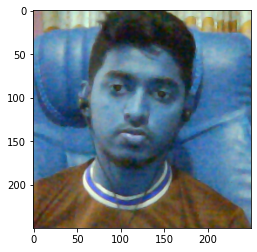

In [167]:
plt.imshow(frame)

In [163]:
frame[:250, :250, :].shape

(250, 250, 3)

In [158]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [159]:
import os
import uuid

In [153]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(3000)

In [32]:
dir_test = anchor.as_numpy_iterator()

In [33]:
print(dir_test.next())

b'data\\anchor\\55f78940-f577-11ec-9daf-b803058baf19.jpg'


In [34]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    return img

In [35]:
img = preprocess('data\\anchor\\561289d0-f577-11ec-970a-b803058baf19.jpg')

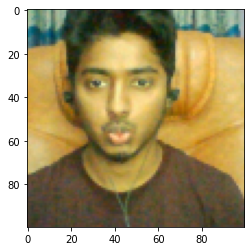

In [36]:
plt.imshow(img)

In [37]:
img.numpy().min() 

0.0

In [38]:
img.numpy().max() 

1.0

In [39]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [40]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [41]:
data

<ConcatenateDataset shapes: ((), (), ()), types: (tf.string, tf.string, tf.float32)>

In [42]:
samples = data.as_numpy_iterator()

In [43]:
example = samples.next()

In [44]:
example

(b'data\\anchor\\53d02d22-f577-11ec-a685-b803058baf19.jpg',
 b'data\\positive\\03258e68-f3fe-11ec-a877-b803058baf19.jpg',
 1.0)

In [45]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [46]:
res = preprocess_twin(*example)

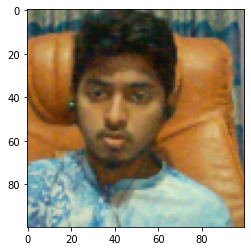

In [47]:
plt.imshow(res[1])

In [48]:
res[2]

1.0

In [49]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [50]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [51]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [52]:
inp = Input(shape=(100,100,3), name='input_image')

In [53]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [54]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [55]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [56]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [57]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [58]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [59]:
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [60]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [61]:
embedding = make_embedding()

In [62]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

In [63]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [64]:
l1 = L1Dist()

In [65]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [66]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [67]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [68]:
siamese_layer = L1Dist()

In [69]:
distances = siamese_layer(inp_embedding, val_embedding)

In [70]:
classifier = Dense(1, activation='sigmoid')(distances)

In [71]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [72]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [73]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_1 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [74]:
def make_siamese_model(): 
    input_image = Input(name='input_img', shape=(100,100,3))
    validation_image = Input(name='validation_img', shape=(100,100,3))
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    classifier = Dense(1, activation='sigmoid')(distances)
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [75]:
siamese_model = make_siamese_model()

In [76]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[2][0]     

In [77]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [78]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [79]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [80]:
test_batch = train_data.as_numpy_iterator()

In [81]:
batch_1 = test_batch.next()

In [82]:
X = batch_1[:2]

In [83]:
y = batch_1[2]

In [84]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [85]:
tf.losses.BinaryCrossentropy??

In [86]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:     
        X = batch[:2]
        y = batch[2]
        yhat = siamese_model(X, training=True)
        loss = binary_cross_loss(y, yhat)
    print(loss)
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    return loss

In [87]:
from tensorflow.keras.metrics import Precision, Recall

In [88]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        r = Recall()
        p = Precision()
        for idx, batch in enumerate(data):
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [89]:
EPOCHS = 50

In [90]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
12/12 [==============================] - 380s 31s/step
0.065872535 0.0 0.0

 Epoch 2/50
12/12 [==============================] - 361s 30s/step
0.005904159 0.0 0.0

 Epoch 3/50
12/12 [==============================] - 374s 31s/step
0.00017905678 0.0 0.0

 Epoch 4/50
12/12 [==============================] - 369s 31s/step
0.0004393032 0.0 0.0

 Epoch 5/50
12/12 [==============================] - 363s 30s/step
0.0017873697 0.0 0.0

 Epoch 6/50
12/12 [==============================] - 361s 30s/step
0.0019316645 0.0 0.0

 Epoch 7/50
12/12 [==============================] - 361s 30s/step
0.002769391 0.0 0.0

 Epoch 8/50
12/12 [==============================] - 370s 31s/step
0.00035486443 0.0 0.0

 Epoch 9/50
12/12 [==============================] - 364s 30s/step
0.0005486495 0.0 0.0

 Epoch 10/50
12/12 [=========================

In [219]:
from tensorflow.keras.metrics import Precision, Recall

In [220]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [221]:
y_hat = siamese_model.predict([test_input, test_val])

In [222]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [223]:
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

In [224]:
y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [225]:
m = Recall()
m.update_state(y_true, y_hat)
m.result().numpy()

0.0

In [226]:
m = Precision()
m.update_state(y_true, y_hat)
m.result().numpy()

0.0

In [227]:
r = Recall()
p = Precision()
for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 
print(r.result().numpy(), p.result().numpy())

1.0 1.0


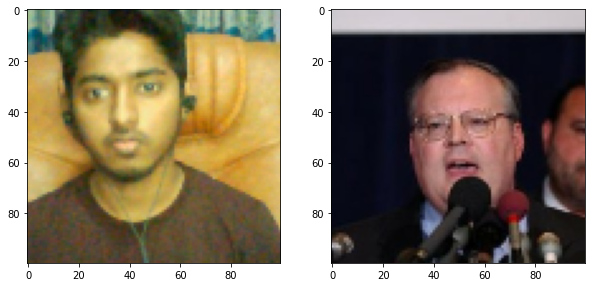

In [228]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

In [229]:
siamese_model.save('siamesemodelv2.h5')

In [230]:
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [231]:
siamese_model.predict([test_input, test_val])

array([[3.9389332e-09],
       [1.5203357e-09]], dtype=float32)

In [232]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_5 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [200]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (2818603333.py, line 1)

In [233]:
os.listdir(os.path.join('application_data', 'verification_images'))

['03258e68-f3fe-11ec-a877-b803058baf19.jpg',
 '040ec752-f3fe-11ec-af3b-b803058baf19.jpg',
 '6521b16c-f6bb-11ec-869d-b803058baf19.jpg',
 '65e50742-f6bb-11ec-bede-b803058baf19.jpg',
 '69200e0c-f6bb-11ec-9b9f-b803058baf19.jpg',
 '69460398-f6bb-11ec-8c91-b803058baf19.jpg',
 '6966bff8-f6bb-11ec-928f-b803058baf19.jpg',
 '6a281e58-f6bb-11ec-9f49-b803058baf19.jpg',
 '6ce8bad2-f6bb-11ec-87fc-b803058baf19.jpg',
 '72cc3c34-f6bb-11ec-a0f9-b803058baf19.jpg',
 'a3b0ae74-f6bb-11ec-973a-b803058baf19.jpg',
 'a3e9be0c-f6bb-11ec-9474-b803058baf19.jpg',
 'a456f474-f6bb-11ec-81ed-b803058baf19.jpg',
 'a49e3e86-f6bb-11ec-a915-b803058baf19.jpg',
 'a4fc802c-f6bb-11ec-9b8f-b803058baf19.jpg',
 'a5730926-f6bb-11ec-8624-b803058baf19.jpg',
 'a5969a82-f6bb-11ec-a609-b803058baf19.jpg',
 'a5d69502-f6bb-11ec-8292-b803058baf19.jpg',
 'a68d4ac2-f6bb-11ec-b75d-b803058baf19.jpg',
 'a79d3f98-f6bb-11ec-8334-b803058baf19.jpg',
 'a7b9a238-f6bb-11ec-ac7e-b803058baf19.jpg',
 'd7f8c95a-f6bb-11ec-9418-b803058baf19.jpg',
 'd82abd62

In [234]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [235]:
30/50

0.6

In [236]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\03258e68-f3fe-11ec-a877-b803058baf19.jpg
application_data\verification_images\040ec752-f3fe-11ec-af3b-b803058baf19.jpg
application_data\verification_images\6521b16c-f6bb-11ec-869d-b803058baf19.jpg
application_data\verification_images\65e50742-f6bb-11ec-bede-b803058baf19.jpg
application_data\verification_images\69200e0c-f6bb-11ec-9b9f-b803058baf19.jpg
application_data\verification_images\69460398-f6bb-11ec-8c91-b803058baf19.jpg
application_data\verification_images\6966bff8-f6bb-11ec-928f-b803058baf19.jpg
application_data\verification_images\6a281e58-f6bb-11ec-9f49-b803058baf19.jpg
application_data\verification_images\6ce8bad2-f6bb-11ec-87fc-b803058baf19.jpg
application_data\verification_images\72cc3c34-f6bb-11ec-a0f9-b803058baf19.jpg
application_data\verification_images\a3b0ae74-f6bb-11ec-973a-b803058baf19.jpg
application_data\verification_images\a3e9be0c-f6bb-11ec-9474-b803058baf19.jpg
application_data\verification_images\a456f474-f6bb-11ec-81ed-b80

In [237]:
def verify(model, detection_threshold, verification_threshold):
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    detection = np.sum(np.array(results) > detection_threshold)
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    return results, verified

In [241]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    cv2.imshow('Verification', frame)
    if cv2.waitKey(10) & 0xFF == ord('v'):
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

True


In [242]:
np.sum(np.squeeze(results) > 0.9)

5

In [243]:
results

[array([[9.041283e-06]], dtype=float32),
 array([[1.3266576e-05]], dtype=float32),
 array([[0.714366]], dtype=float32),
 array([[0.5334609]], dtype=float32),
 array([[0.84656656]], dtype=float32),
 array([[0.68106234]], dtype=float32),
 array([[0.7329961]], dtype=float32),
 array([[0.22304821]], dtype=float32),
 array([[0.6081542]], dtype=float32),
 array([[0.7604584]], dtype=float32),
 array([[0.9191452]], dtype=float32),
 array([[0.79384476]], dtype=float32),
 array([[0.80162543]], dtype=float32),
 array([[0.61758494]], dtype=float32),
 array([[0.8415874]], dtype=float32),
 array([[0.7887535]], dtype=float32),
 array([[0.742191]], dtype=float32),
 array([[0.7372641]], dtype=float32),
 array([[0.8185843]], dtype=float32),
 array([[0.70639765]], dtype=float32),
 array([[0.8687155]], dtype=float32),
 array([[0.6722176]], dtype=float32),
 array([[0.5640341]], dtype=float32),
 array([[0.86935365]], dtype=float32),
 array([[0.79831344]], dtype=float32),
 array([[0.8932657]], dtype=float32)